# HomeWork07
<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Exercise 1:** Find cluster of stars.

**Scientific context**: Stars are born within clouds of dust ("_star-forming regions_") and scattered throughout the galaxy. A star-forming region is a region of the celestial sphere within which predominately very young stellar objects (YSOs) are located. For that reason, star-forming regions are of particular importance in modern astronomy, since many conclusions about birth and evolution of young stars can be inferred by study them. Moreover, the way that stars are clustered (_distributed_) in those regions can provide important information about the star-forming processes that take place. They therefore hold a strong discriminatory power concerning the theoretical models of star formation. For this reason, it is extremely important to have a model that can easily identify groups of stars (_clusters_) on the sky using only their coordinates.
<br><br>
    
**Objective:** Create a clustering model that could be implemented in future studies to identify clusters of stars in star-forming regions.
<br><br>
    
**Dataset:** We deal with a dataset consisting of Local Group stars coordinates (X,Y) on the sky. Each data point represents the position of a bright star on the night sky. The name of the dataset is `HW07_data.csv`.
<br><br>
    
**Tasks:**

- **Ex. 1.1:**
    - Load the data and plot a scatter plot. Guess how many `n_clusters` are the optimal if run a ```KMEAN``` clustering. 
    - Use `KMeans()` as a clustering method to find the potential clusters of stars in this dataset. You may play around with the `n_clusters` parameter to find a reasonable amount of clusters.
    - Using this approximate search, plot the data along with the computed centroids, using a different color for the different predicted "classes" (_cluster labels_) in order to display how the clustering algorithm has separated the datapoints.
    - _Elbow method_ $-$ Make a plot of the **inertia** as a function of the `n_clusters` parameter to infer the real value of the number of clusters in the dataset.
    - Using the best hyperparameter found in this way, plot/print the coordinates of the centroids.
<br><br>

- **Ex. 1.2:**
Read carefully the notes found at [this link](https://www.geeksforgeeks.org/clustering-metrics/), and:<br>
    - Write a function that calculates the Davies Bouldin Index (**Don't use the already existing one from sklearn**). For simplicity, you may use the `KMeans()` with `n_clusters`=3;
    - then, repeat for `n_clusters`=5.
<br><br>

- **Ex. 1.3:** Describe in your own way which, among the results obtained in **Ex. 1.2**, you consider as the best. Could you think of any reasonable statistical way to assess it?
<br><br>
    
- **Ex. 1.4: [Bonus]**: Do the same as in **Ex. 1.2** but now calculate the Calinski-Harabasz Index (**Again don't use the already existing one from sklearn**)
</div>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Exercise 2:** Compare algorithms.

**Tasks:**

- **Ex. 2.1:** Instead of using `KMeans()`, adopt the `DBSCAN()` clustering algorithm to find the clusters of stars in the dataset.<br><br>

    - Make a plot of the data along with the predicted labels (_use different colors to visualize different labels_).
    - Play around with the parameters `eps` and `min_samples` until you are satisfied with the result.
    - Print the coordinates of the centroids.<br><br>

- **Ex. 2.2:** Comment on the results of each method (i.e., `KMeans()` _vs._ `DBSCAN()`) and argue in favor of one of them, trying to convince a hypothetical supervisor.
</div>

# Ex. 1.1

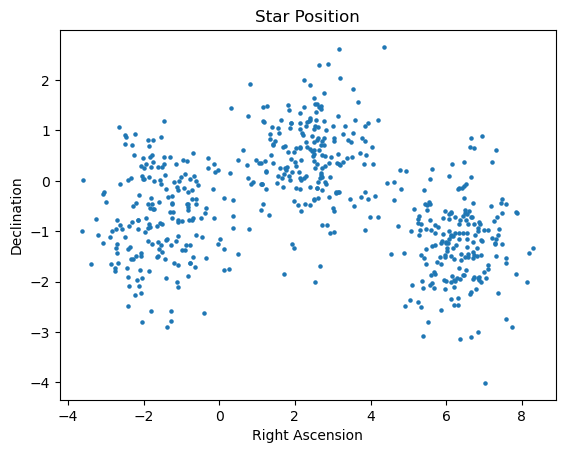

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd. read_csv('C:/Users/micha/Desktop/python_datafiles/HW07_data.csv')
x=data['RA']
y=data['Dec']
plt.scatter(x,y,s=5)
plt.title('Star Position')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.show()

**Initial Guess: the optimal n_clusters is 5**

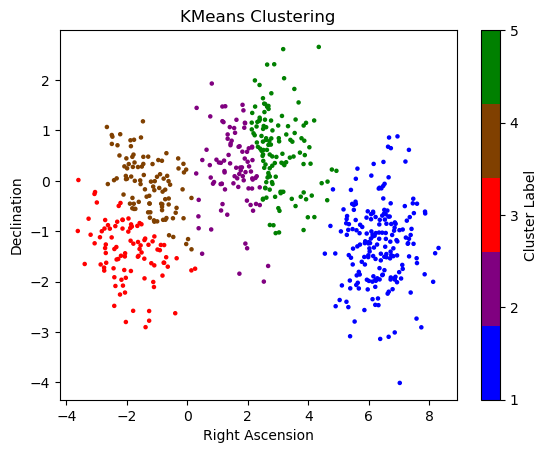

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import matplotlib
import warnings
warnings.filterwarnings("ignore")

guess_n_cluster=5

kmeans_in_model = KMeans(n_clusters=guess_n_cluster, random_state=42)
kmeans_in_model.fit(data)
labels1=kmeans_in_model.labels_


# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map1 = matplotlib.cm.gray.from_list('whatever', ('blue', 'red','green'), N=guess_n_cluster)
scat1 = plt.scatter( x, y, c=labels1, edgecolors='face', cmap=new_map1, s=5)
cb1 = plt.colorbar(scat1, ticks=range(0,guess_n_cluster+1,1))   # number of clusters
cb1.set_ticklabels(range(1,guess_n_cluster+2,1))
cb1.set_label('Cluster Label')
plt.title('KMeans Clustering')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.show()

**Elbow Method**

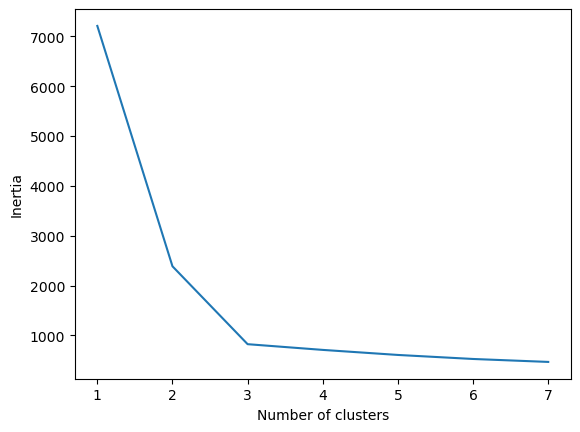

In [6]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

inert = []
xclusters = range(1,8)
for i in xclusters:
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(data)
    inert.append(kmeans_model.inertia_)
plt.plot( xclusters, inert)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**So number of clusters is 3**

Centers:
for cluster 1, (Right Ascension,Declination) = [-1.53604976 -0.71939755]
for cluster 2, (Right Ascension,Declination) = [ 6.3108396  -1.22437637]
for cluster 3, (Right Ascension,Declination) = [2.40220016 0.46933107]


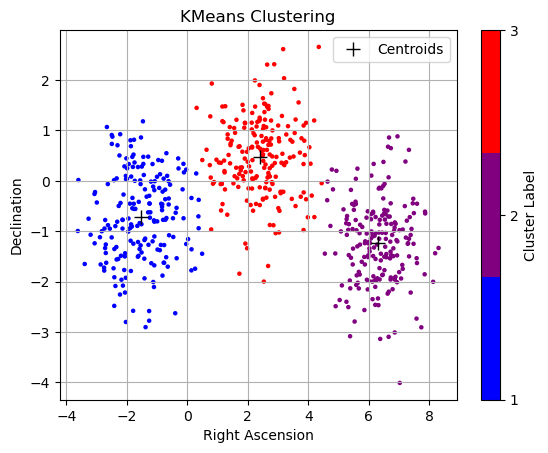

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import matplotlib

n_clusters=3

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(data)
labels=kmeans_model.labels_

#coordinates of the clusters centroids
print("Centers:")
centers=kmeans_model.cluster_centers_

for j in range(3):
    print(f'for cluster {j+1}, (Right Ascension,Declination) = {centers[j]}')
    
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=10, label='Centroids')

new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=n_clusters)
scat2 = plt.scatter(x,y,c=labels,cmap=new_map,s=5)
cb = plt.colorbar(scat2,ticks=range(0,n_clusters+1,1))   #number of clusters
cb.set_ticklabels(range(1,n_clusters+2,1))
cb.set_label('Cluster Label')
plt.title('KMeans Clustering')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend()
plt.grid()
plt.show()

# Ex. 1.2

In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

X = np.column_stack((x,y)) #2D

kmeans_3=KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)
labels_3=kmeans_3.labels_
centers_3=kmeans_3.cluster_centers_

def davies_bouldin_index(X,labels,centers):
    n_clusters=len(centers)
    dbi=0
    
    for i in range(n_clusters):
        max_ratio = -1  #small init value
        
        for j in range(n_clusters):
            if i != j:
                distance_ij = np.linalg.norm(centers[i] - centers[j]) #distance between centroids of cluster i and j
                mean_i=np.mean([np.linalg.norm(k-centers[i]) for k in X[labels == i]]) #mean distance of points from centroid of cluster i
                mean_j=np.mean([np.linalg.norm(k-centers[j]) for k in X[labels == j]])#mean distance of points from its centroid of cluster j
                
                ratio = (mean_i + mean_j) / distance_ij #dbi for clusters i,j
                max_ratio = max(max_ratio, ratio) 
        dbi += max_ratio
    return dbi/n_clusters  #average dbi 

#dbi for n_clusters=3
dbi_3=davies_bouldin_index(X,labels_3,centers_3)
print(f'Davies-Bouldin Index for n_clusters=3: {dbi_3}')

Davies-Bouldin Index for n_clusters=3: 0.5060011067328506


In [39]:
#dbi for n_clusters=5
kmeans_5=KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X)
labels_5=kmeans_5.labels_
centers_5=kmeans_5.cluster_centers_

dbi_5=davies_bouldin_index(X,labels_5,centers_5)
print(f'Davies-Bouldin Index for n_clusters=5: {dbi_5}')

Davies-Bouldin Index for n_clusters=5: 0.9857463453127941


# Ex. 1.3

*Όπως ήταν αναμενόμενο, έχουμε καλύτερο dbi για n_clusters=3 καθώς είδαμε και από τα plots του Ex. 1.1 ότι έχουμε καλύτερο clustering για n_clusters=3, κι έτσι κι εδώ dbi_3 < dbi_5 άρα dbi_3 καλύτερο (the lower the dbi, the better the clustering).* 

*Επιπλέον, το elbow method που εφαρμόσαμε στο προηγούμενο ερώτημα επιβεβαιώνει τα παραπάνω.*

# Ex. 2.1

Centroids:
for cluster 0, (Right Ascension,Declination) = [-1.51663899 -0.66183512]
for cluster 1, (Right Ascension,Declination) = [2.46112825 0.45635023]
for cluster 2, (Right Ascension,Declination) = [ 6.31432491 -1.20183703]


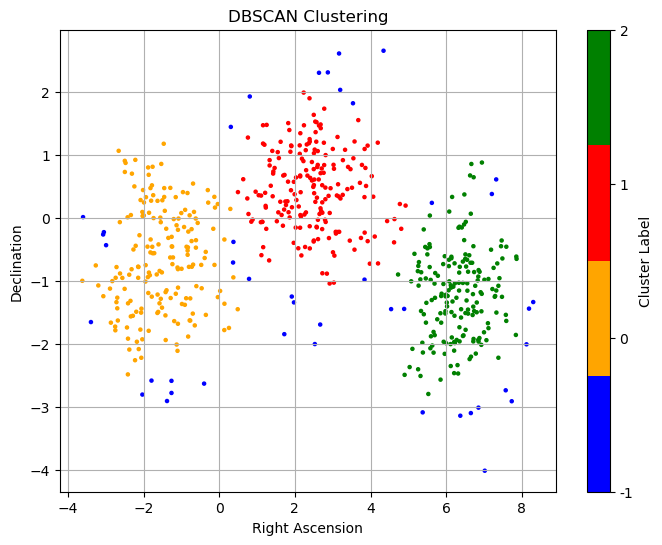

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

dbscan_model = DBSCAN(eps=0.44, min_samples=5)
fit = dbscan_model.fit(data)
labels2 = dbscan_model.labels_


unique_labels =list(set(labels2))
n_clust = len(unique_labels)


colors = ['blue', 'orange', 'red', 'green']  
cmap = ListedColormap(colors[:n_clust])


plt.figure(figsize=(8, 6))
scat3 = plt.scatter(x, y, c=labels2, cmap=cmap, s=5)
cb3 = plt.colorbar(scat3, ticks=unique_labels)
cb3.set_ticklabels([label for label in unique_labels])
cb3.set_label('Cluster Label')
plt.title('DBSCAN Clustering')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.grid()


#centroids
centroids = []
data_arr=np.array(data)

for i in unique_labels:
    if i != -1: #excluding outliers (label=-1)
        cluster = data_arr[labels2 == i]
        centroid = cluster.mean(axis=0)
        centroids.append(centroid)

print("Centroids:")
for j in range(3):
    print(f'for cluster {j}, (Right Ascension,Declination) = {centroids[j]}')

# Ex. 2.2


**Εδώ, έχουμε ένα dataset με σχετικά καλά διαχωρισμένα clusters, δηλαδή και με το μάτι μπορούσαμε να δούμε από το πρώτο plot ότι τα clusters μάλλον θα είναι 3. Οπότε σε τέτοιες περιπτώσεις ο KMeans δουλεύει μια χαρά, κι ίσως και καλύτερα από τον DBSCAN.
Εν γένει όμως το dataset που θα έχουμε μπορεί να περιέχει πολλούς outliers, ή τα clusters να έχουν περίεργο σχήμα (όχι σφαιρικό), οπότε και να μην είναι εξαρχής προφανές πόσα clusters θα έχω. Η ικανότητα του DBSCAN να διαχειρίζεται τον θόρυβο (outliers) και την πυκνότητα των datas το καθιστά καλύτερο σε πιο σύνθετα datasets. Άρα, συνοπτικά:**

***KMeans:***

*-αν ήδη γνωρίζεις τον αριθμό των clusters ή έχεις μια εκτίμηση number*

*-σφαιρικά datasets ή με λίγο θόρυβο (outliers)*

*-γρηγορότερο*

***DBSCAN:***

*-δεν χρειάζεται να γνωρίζεις τον αριθμό των clusters απο πριν*

*-διαχειρίζεται και πιο complex and "noisy" datasets*

*-όχι τόσο γρήγορο σε μεγάλα datasets*


#